In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import Dense, Flatten, Reshape, LeakyReLU
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

In [ ]:
# Load MNIST data
(X_train, _), (_, _) = tf.keras.datasets.mnist.load_data()
X_train = X_train / 127.5 - 1.0  # Normalize to [-1, 1]
X_train = X_train.reshape(-1, 28 * 28)  # Flatten

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
# Hyperparameters
latent_dim = 100
epochs = 10000
batch_size = 128
sample_interval = 1000

In [ ]:
# Build the Generator
def build_generator():
    model = Sequential([
        Dense(128, input_dim=latent_dim),
        LeakyReLU(0.2),
        Dense(784, activation='tanh'),
        Reshape((28, 28))
    ])
    return model

In [ ]:
# Build the Discriminator
def build_discriminator():
    model = Sequential([
        Flatten(input_shape=(28, 28)),
        Dense(128),
        LeakyReLU(0.2),
        Dense(1, activation='sigmoid')
    ])
    return model

In [ ]:
# Compile discriminator
discriminator = build_discriminator()
discriminator.compile(loss='binary_crossentropy', optimizer=Adam(0.0002), metrics=['accuracy'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
# Build generator
generator = build_generator()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Combined model (stacked GAN)
z = tf.keras.Input(shape=(latent_dim,))
img = generator(z)
discriminator.trainable = False
valid = discriminator(img)
gan = tf.keras.Model(z, valid)
gan.compile(loss='binary_crossentropy', optimizer=Adam(0.0002))

In [ ]:
for epoch in range(epochs + 1):
    # Train Discriminator
    idx = np.random.randint(0, X_train.shape[0], batch_size)
    real_imgs = X_train[idx].reshape(-1, 28, 28)

    noise = np.random.normal(0, 1, (batch_size, latent_dim))
    gen_imgs = generator.predict(noise)

    d_loss_real = discriminator.train_on_batch(real_imgs, np.ones((batch_size, 1)))
    d_loss_fake = discriminator.train_on_batch(gen_imgs, np.zeros((batch_size, 1)))

    # Fix: properly unpack loss and accuracy
    d_loss = 0.5 * (d_loss_real[0] + d_loss_fake[0])
    d_acc = 0.5 * (d_loss_real[1] + d_loss_fake[1])

    # Train Generator
    noise = np.random.normal(0, 1, (batch_size, latent_dim))
    g_loss = gan.train_on_batch(noise, np.ones((batch_size, 1)))

    # Print training progress
    if epoch % 100 == 0:
        print(f"{epoch} [D loss: {d_loss:.4f}, acc.: {100 * d_acc:.2f}%] [G loss: {g_loss:.4f}]")


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step  


/usr/local/lib/python3.11/dist-packages/keras/src/backend/tensorflow/trainer.py:82: UserWarning: The model does not have any trainable weights.
  warnings.warn("The model does not have any trainable weights.")


Streaming output truncated to the last 5000 lines.
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


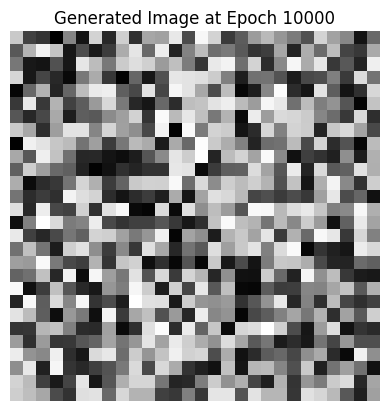

In [ ]:
 # Save generated images
if epoch % sample_interval == 0:
  noise = np.random.normal(0, 1, (1, latent_dim))
  gen_img = generator.predict(noise).reshape(28, 28)
  plt.imshow(gen_img, cmap='gray')
  plt.title(f"Generated Image at Epoch {epoch}")
  plt.axis('off')
  plt.show()